# Importing Required Libraries

In [1]:
from sklearn.cluster import KMeans,AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples,silhouette_score

In [2]:
X = pd.read_excel('Standardized_RFM_data.xlsx',index_col=0)

# K-Means Clustering with Number of Clusters=3

Cluster Centers :

 [[ 1.52397114e+00 -3.45142234e-01 -1.74872550e-01]
 [-8.54098204e-01  8.75956679e+00  9.72663148e+00]
 [-5.18088882e-01  5.64503308e-02 -8.98621008e-03]]

             Recency  Frequency  TotalQuantity  Cluster_ID
CustomerID                                                
12346       2.316568  -0.329362      -0.231001           0
12347      -0.889050   0.206102       0.293432           2
12348      -0.164560  -0.115176      -0.012316           2
12349      -0.730258  -0.436455      -0.017146           2
12350       2.167700  -0.436455      -0.190312           0
12352      -0.551616   0.634474      -0.042958           2
12353       1.115702  -0.436455      -0.220172           0
12354       1.393588  -0.436455      -0.099662           0
12355       1.214947  -0.436455      -0.175102           0
12356      -0.690559  -0.222269       0.111089           2


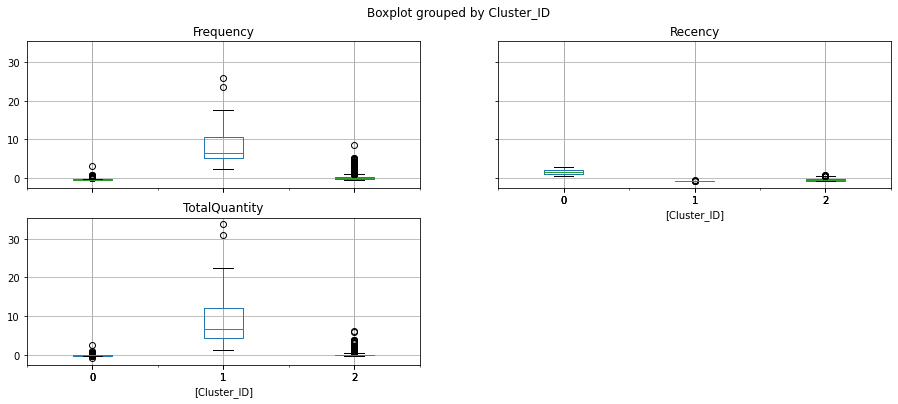

In [3]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

print('Cluster Centers :')
print('\n',centroids)
print()

X['Cluster_ID'] = labels
print(X.head(10))


X.boxplot(by = 'Cluster_ID',figsize=(15,6))
plt.show()

### CountPlot - K-Means Clustering

<AxesSubplot:xlabel='Cluster_ID', ylabel='count'>

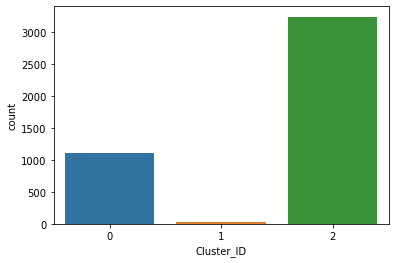

In [4]:
sns.countplot(x="Cluster_ID", data=X)

# Agglomerative Clustering with Number of Clusters = 3

In [5]:
Y = pd.read_excel('Standardized_RFM_data.xlsx',index_col=0)

             Recency  Frequency  TotalQuantity  Cluster_ID
CustomerID                                                
12346       2.316568  -0.329362      -0.231001           2
12347      -0.889050   0.206102       0.293432           1
12348      -0.164560  -0.115176      -0.012316           1
12349      -0.730258  -0.436455      -0.017146           1
12350       2.167700  -0.436455      -0.190312           2
12352      -0.551616   0.634474      -0.042958           1
12353       1.115702  -0.436455      -0.220172           2
12354       1.393588  -0.436455      -0.099662           2
12355       1.214947  -0.436455      -0.175102           2
12356      -0.690559  -0.222269       0.111089           1


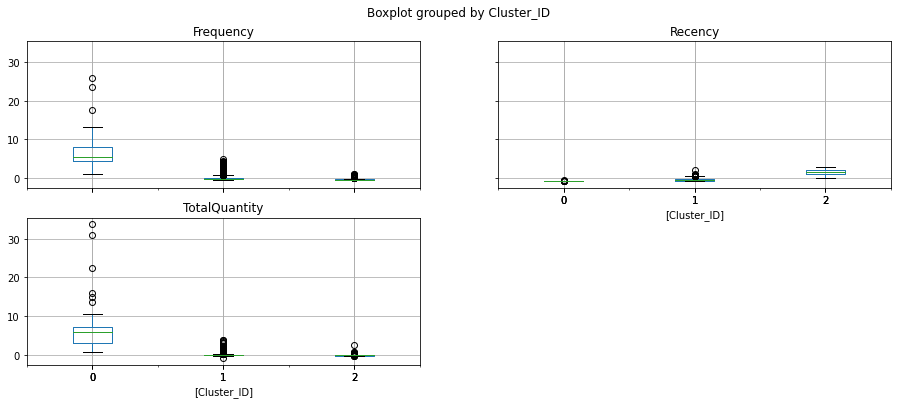

In [6]:
Agg_model = AgglomerativeClustering(n_clusters=3)
Agg_model = Agg_model.fit_predict(Y)

new = Agg_model.tolist()
Y['Cluster_ID'] = new

print(Y.head(10))


Y.boxplot(by = 'Cluster_ID',figsize=(15,6))
plt.show()

### CountPlot - Agglomerative Clustering

<AxesSubplot:xlabel='Cluster_ID', ylabel='count'>

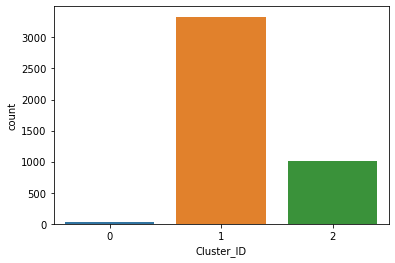

In [7]:
sns.countplot(x="Cluster_ID", data=Y)

## Silhouette Score Comparison for K-Means and Agglomerative model

In [8]:
KMeans_silhoutte_scores = silhouette_score(X, kmeans.labels_)
print('Silhouette Score for K-Means Clustering: ',KMeans_silhoutte_scores)
Agg_silhoutte_scores = silhouette_score(Y, Agg_model)
print('Silhouette Score for Agglomerative Clustering: ',Agg_silhoutte_scores)

Silhouette Score for K-Means Clustering:  0.7121444735425034
Silhouette Score for Agglomerative Clustering:  0.6431002568741784
